In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy as sc

In [48]:
size = 500
start = 1
end = 5

time_points = np.linspace(start, end, size)

first_class = []
second_class = []
third_class = []

for i in range(1, 3):
    shift = i / 2
    first_class += [np.log(time_points) + shift]
    second_class += [np.sin(time_points) + shift]
    third_class += [np.sqrt(time_points) + shift]

for i in range(1, 3):
    first_class += [np.log(time_points) + np.random.normal(size=size, scale=0.05 * i)]
    second_class += [np.sin(time_points) + np.random.normal(size=size, scale=0.05 * i)]
    third_class += [np.sqrt(time_points) + np.random.normal(size=size, scale=0.05 * i)]

for i in range(1, 4):
    shift = i / 3
    first_class += [np.log(time_points + shift)]
    second_class += [np.sin(time_points + shift)]
    third_class += [np.sqrt(time_points + shift)]



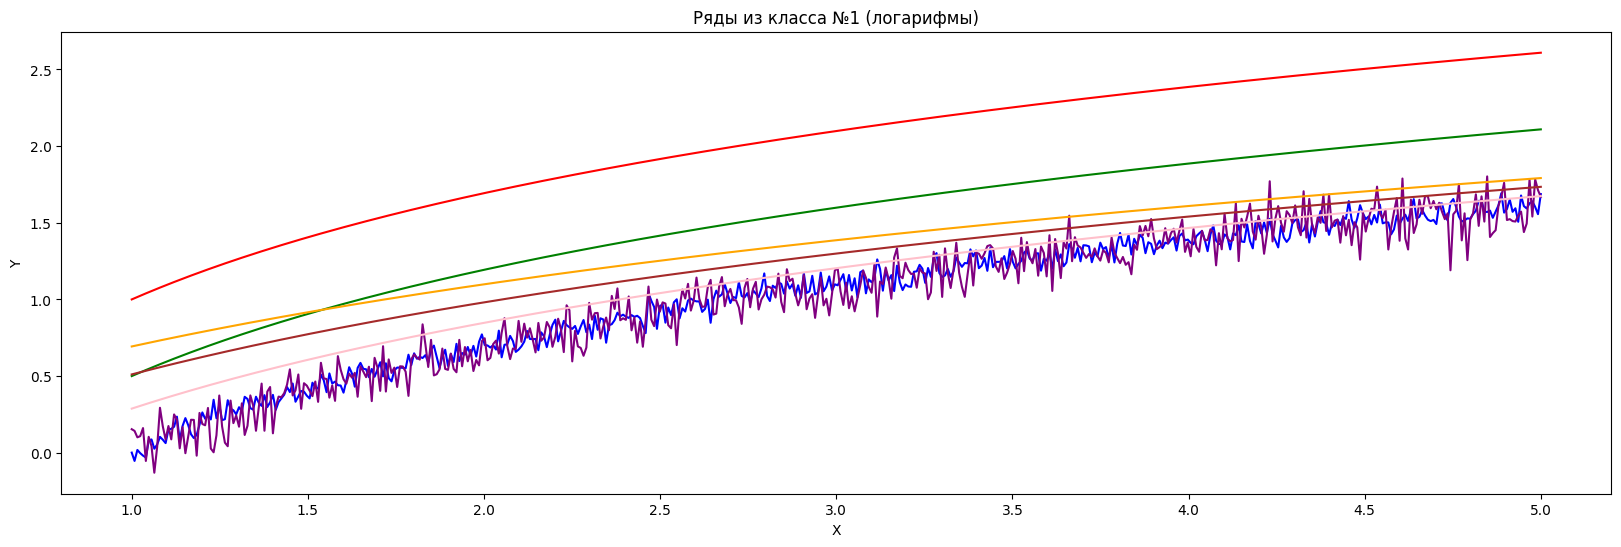

In [49]:
colors = ["green", "red", "blue", "purple", "pink", "brown", "orange"]
plt.figure(figsize=(20, 6))
for i in range(7):
    plt.plot(time_points, first_class[i], color=colors[i])
    # plt.plot(time_points, second_class[i], color="blue")
    # plt.plot(time_points, third_class[i], color="red")
plt.title('Ряды из класса №1 (логарифмы)')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

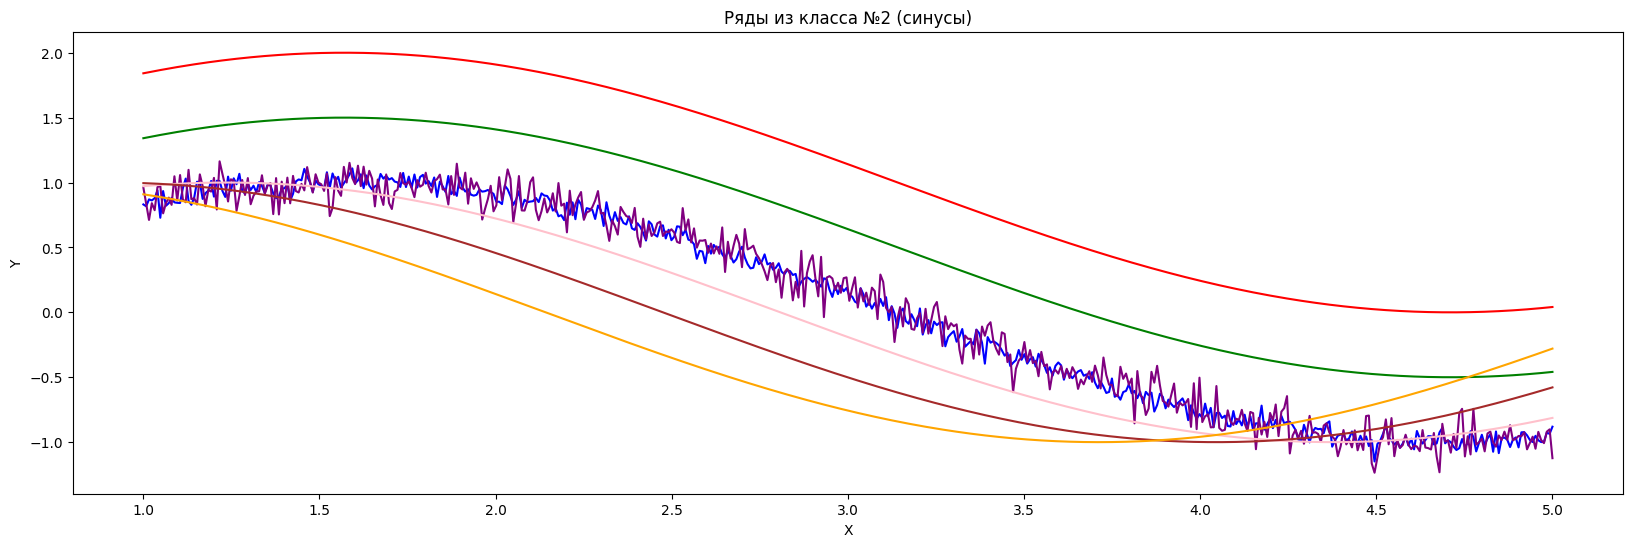

In [50]:
colors = ["green", "red", "blue", "purple", "pink", "brown", "orange"]
plt.figure(figsize=(20, 6))
for i in range(7):
    plt.plot(time_points, second_class[i], color=colors[i])
    # plt.plot(time_points, second_class[i], color="blue")
    # plt.plot(time_points, third_class[i], color="red")
plt.title('Ряды из класса №2 (синусы)')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

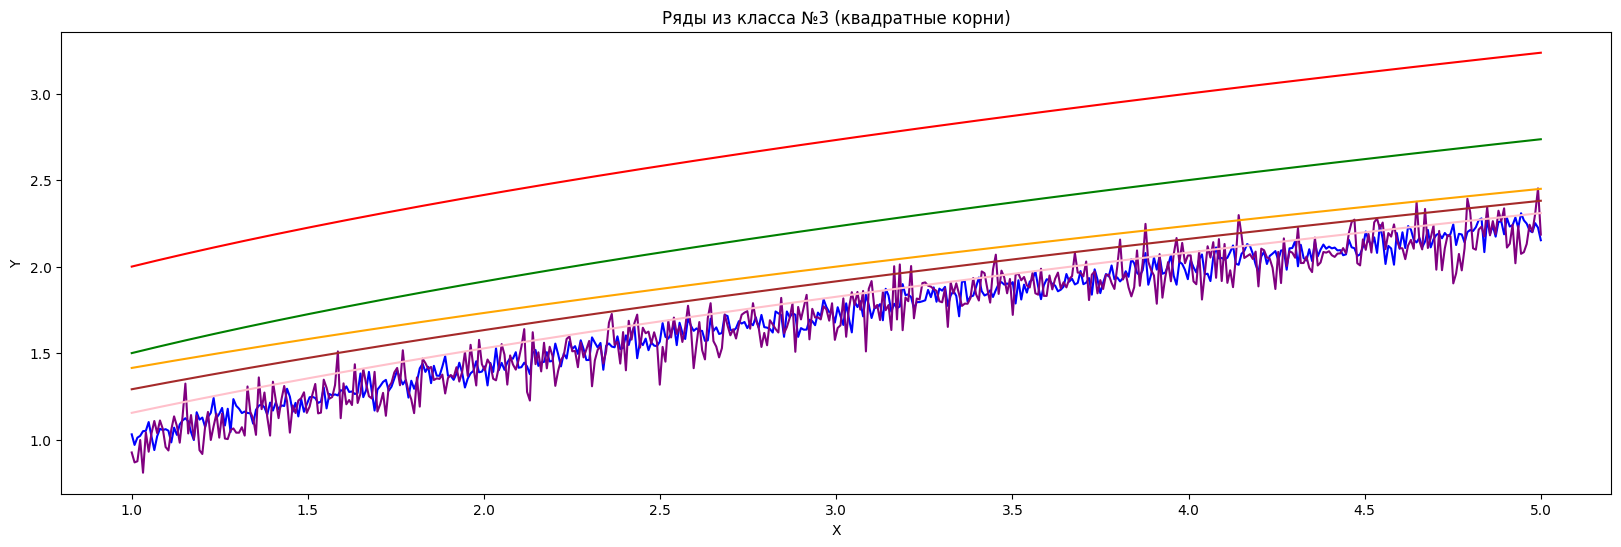

In [51]:
colors = ["green", "red", "blue", "purple", "pink", "brown", "orange"]
plt.figure(figsize=(20, 6))
for i in range(7):
    plt.plot(time_points, third_class[i], color=colors[i])
    # plt.plot(time_points, second_class[i], color="blue")
    # plt.plot(time_points, third_class[i], color="red")
plt.title('Ряды из класса №3 (квадратные корни)')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [52]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def distances_matrix(classes, metric):
    result = []
    for i in range(len(classes)):
        result += [[]]
        for j in range(len(classes)):
            result[i] += [metric(classes[i], classes[j]).round(3)]
    return np.array(result)

In [54]:
print("Матрица расстояний по формуле Евклида для первого класса (логарифмы):\n", distances_matrix(first_class, euclidean_distance))
print("\nМатрица расстояний по формуле Евклида для второго класса (синусы):\n", distances_matrix(second_class, euclidean_distance))
print("\nМатрица расстояний по формуле Евклида для третьего класса (квадратный корень):\n", distances_matrix(third_class, euclidean_distance))

Матрица расстояний по формуле Евклида для первого класса (логарифмы):
 [[ 0.    11.18  11.117 11.434  8.491  6.362  4.809]
 [11.18   0.    22.268 22.496 19.619 17.293 15.277]
 [11.117 22.268  0.     2.614  3.137  5.64   7.887]
 [11.434 22.496  2.614  0.     3.864  6.145  8.3  ]
 [ 8.491 19.619  3.137  3.864  0.     2.602  4.885]
 [ 6.362 17.293  5.64   6.145  2.602  0.     2.284]
 [ 4.809 15.277  7.887  8.3    4.885  2.284  0.   ]]

Матрица расстояний по формуле Евклида для второго класса (синусы):
 [[ 0.    11.18  11.241 11.286 14.913 18.938 22.918]
 [11.18   0.    22.393 22.351 25.933 29.65  33.22 ]
 [11.241 22.393  0.     2.543  4.797  9.411 14.043]
 [11.286 22.351  2.543  0.     5.418  9.842 14.379]
 [14.913 25.933  4.797  5.418  0.     4.856  9.845]
 [18.938 29.65   9.411  9.842  4.856  0.     5.152]
 [22.918 33.22  14.043 14.379  9.845  5.152  0.   ]]

Матрица расстояний по формуле Евклида для третьего класса (квадратный корень):
 [[ 0.    11.18  11.113 11.4    8.968  6.921  5.03

In [55]:
print("Расстояние по формуле Евклида между экземплярами классов №1 (логарифмы) и №2 (синусы):\n", euclidean_distance(first_class[0], second_class[0]).round(3))
print("Расстояние по формуле Евклида между экземплярами классов №2 (синусы) и №3 (квадратные корни):\n", euclidean_distance(second_class[0], third_class[0]).round(3))
print("Расстояние по формуле Евклида между экземплярами классов №3 (квадратные корни) и №1 (логарифмы):\n", euclidean_distance(third_class[0], first_class[0]).round(3))

Расстояние по формуле Евклида между экземплярами классов №1 (логарифмы) и №2 (синусы):
 33.91
Расстояние по формуле Евклида между экземплярами классов №2 (синусы) и №3 (квадратные корни):
 44.084
Расстояние по формуле Евклида между экземплярами классов №3 (квадратные корни) и №1 (логарифмы):
 15.475


In [56]:
def matrix_of_distance(x, y, q):
    result = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            result[i,j] = np.abs((x[j] - y[i]))**q
    return result

def DTW(x, y):
    size = len(x)

    distances = matrix_of_distance(x, y, 2)
    
    R = [[0] * (size + 1) for i in range(size + 1)]
    
    for i in range(1, size):
        R[i][0] = distances[i,0] + R[i-1][0] 
        R[0][i] = distances[0,i] + R[0][i-1]
  
    for i in range(1,size + 1): 
        for j in range(1,size + 1):
            R[i][j] = distances[i - 1,j - 1] + np.min([R[i - 1][j - 1], R[i][j - 1], R[i - 1][j]])
    pth = []
    i = size
    j = size
    while i >= 0 and j >= 0:
        pth.append((i,j))
        if R[i][j-1] <= R[i-1][j-1] and R[i][j-1] <= R[i-1][j]:
            I = i
            J = j-1                
        
        if R[i-1][j] <= R[i-1][j-1] and R[i-1][j] <= R[i][j-1]:
            I = i - 1
            J = j 

        if R[i-1][j-1] <= R[i][j-1] and R[i-1][j-1] <= R[i-1][j]:
            I = i - 1
            J = j - 1
        
        i = I
        j = J
    s = 0
    for l in pth:
        s += R[l[0]][l[1]]
    s = s / len(pth) 
    return s

In [57]:
print("Матрица расстояний по формуле DTW для первого класса (логарифмы):\n", distances_matrix(first_class, DTW))
print("\nМатрица расстояний по формуле DTW для второго класса (синусы):\n", distances_matrix(second_class, DTW))
print("\nМатрица расстояний по формуле DTW для третьего класса (квадратный корень):\n", distances_matrix(third_class, DTW))

Матрица расстояний по формуле DTW для первого класса (логарифмы):
 [[ 0.     7.726  6.972  9.079  1.812  0.755  0.698]
 [ 7.726  0.    49.392 51.707 38.526 22.439 13.425]
 [ 6.972 49.392  0.     1.256  1.54   6.261 15.703]
 [ 9.079 51.707  1.256  0.     3.318  8.684 18.807]
 [ 1.812 38.526  1.54   3.318  0.     0.618  3.906]
 [ 0.755 22.439  6.261  8.684  0.618  0.     0.417]
 [ 0.698 13.425 15.703 18.807  3.906  0.417  0.   ]]

Матрица расстояний по формуле DTW для второго класса (синусы):
 [[0.00000e+00 3.33210e+01 2.62250e+01 1.94050e+01 3.18640e+01 3.40150e+01
  4.97860e+01]
 [3.33210e+01 0.00000e+00 1.41167e+02 1.20484e+02 1.46952e+02 1.21832e+02
  1.09083e+02]
 [2.62250e+01 1.41167e+02 0.00000e+00 1.31700e+00 7.77000e-01 9.64000e-01
  1.54700e+00]
 [1.94050e+01 1.20484e+02 1.31700e+00 0.00000e+00 2.57600e+00 2.72900e+00
  3.24700e+00]
 [3.18640e+01 1.46952e+02 7.77000e-01 2.57600e+00 0.00000e+00 1.80000e-02
  6.50000e-01]
 [3.40150e+01 1.21832e+02 9.64000e-01 2.72900e+00 1.80000e

In [58]:
print("Расстояние по формуле DTW между экземплярами классов №1 (логарифмы) и №2 (синусы):\n", DTW(first_class[0], second_class[0]).round(3))
print("Расстояние по формуле DTW между экземплярами классов №2 (синусы) и №3 (квадратные корни):\n", DTW(second_class[0], third_class[0]).round(3))
print("Расстояние по формуле DTW между экземплярами классов №3 (квадратные корни) и №1 (логарифмы):\n", DTW(third_class[0], first_class[0]).round(3))

Расстояние по формуле DTW между экземплярами классов №1 (логарифмы) и №2 (синусы):
 193.31
Расстояние по формуле DTW между экземплярами классов №2 (синусы) и №3 (квадратные корни):
 394.147
Расстояние по формуле DTW между экземплярами классов №3 (квадратные корни) и №1 (логарифмы):
 26.62


Вывод: метрика DTW намного сильнее увеличивает расстояние между рядами по мере уменьшения их схожести. Добавление шумов сильнее влияет на расстояние между рядами, нежели их линейное смещение по X или по Y. 

In [67]:
import random

x = []
Y = []
all_tseries = first_class + second_class + third_class
for i in range(1, 22):
    x.append(all_tseries[i - 1])
    if i < 8:
        Y.append(1)
    if i >= 8 and i < 15:
        Y.append(2)
    if i >= 15:
        Y.append(3)

X_train = []
X_test = []
y_train = []
y_test = []

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 2 / 3)):
    X_train.append(x[indexes[i] - 1])
    y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 2 / 3), len(Y)):
    X_test.append(x[indexes[i] - 1])
    y_test.append(Y[indexes[i] - 1])


print(y_train)
print(y_test)

[3, 2, 2, 1, 3, 3, 3, 2, 2, 1, 3, 2, 1, 1]
[3, 1, 2, 1, 3, 1, 2]


In [69]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

print("--- Классификатор KNN с DTW ---\n")
print(f"Accuracy = {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}\n")

--- Классификатор KNN с DTW ---

Accuracy = 0.8571428571428571
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3

Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3

Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2



In [70]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

print("--- Классификатор KNN со стандартной метрикой расстояния ---\n")
print(f"Accuracy = {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}\n")

--- Классификатор KNN со стандартной метрикой расстояния ---

Accuracy = 0.8571428571428571
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3

Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3

Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2



In [71]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest()
clf.fit(X_train, y_train)

print("--- Классификатор TimeSeriesForest ---\n")
print(f"Accuracy = {clf.score(X_test, y_test)}")
for i in range(len(X_test)):
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {y_test[i]}\n")

--- Классификатор TimeSeriesForest ---

Accuracy = 0.7142857142857143
Вектор вероятности принадлежности к классам [[0.432 0.066 0.502]]
Истинный класс для предсказаний 3

Вектор вероятности принадлежности к классам [[0.456 0.038 0.506]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0.21  0.714 0.076]]
Истинный класс для предсказаний 2

Вектор вероятности принадлежности к классам [[0.446 0.038 0.516]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0.302 0.056 0.642]]
Истинный класс для предсказаний 3

Вектор вероятности принадлежности к классам [[0.51  0.004 0.486]]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [[0.284 0.596 0.12 ]]
Истинный класс для предсказаний 2



KNN классификаторы одинакого точно предсказали принадлежность к классу, а вот классификатор TimeSeriesForest предсказывал с меньшей точность, однако он показал насколько сильно модель уверена в своих предсказаниях (например, на 4-ом и 6-ом тестах она в теории могла отнести ряд и к первому классу, если бы тренировочная выборка содеражала больше данных).